In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import webrtcvad


In [2]:
## Task 1: Read the .wav file, get the sampling rate, number of samples, time data.
file_path = "/Users/jithinbathula/Documents/Internships/Panasonic/Audio 2/clip2.wav"

sampling_rate,data = wavfile.read(file_path)
num_of_samples = data.shape[0]
duration = num_of_samples/sampling_rate
time_data = np.linspace(0, duration, num_of_samples)

print(f"Sampling Rate: {sampling_rate} Hz")
print(f"Number of Samples: {num_of_samples}")
print(f"Duration: {duration} seconds")
print(time_data)

Sampling Rate: 32000 Hz
Number of Samples: 144144
Duration: 4.5045 seconds
[0.00000000e+00 3.12502168e-05 6.25004336e-05 ... 4.50443750e+00
 4.50446875e+00 4.50450000e+00]


/var/folders/dy/4c03n77d0472bywlw4slln600000gn/T/ipykernel_65188/620904314.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate,data = wavfile.read(file_path)


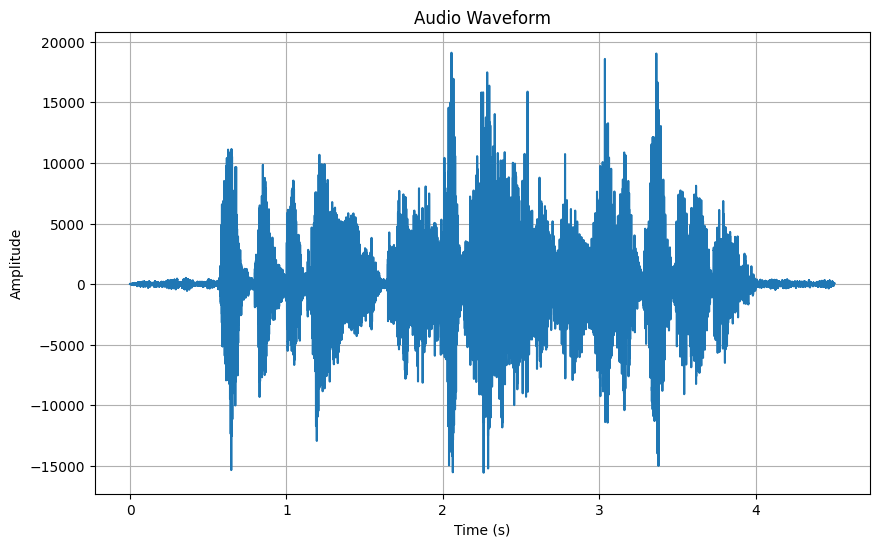

In [3]:
## Task 2: Plot the data obtained from 1) against a time axis in seconds, i.e., the x‐axis should be labeled in Time (s)
if len(data.shape) > 1: ## Here I am checking if the audio has multiple channels and if it does, i am choosing only one for simplicity
    data = data[:, 0]
    
plt.figure(figsize=(10, 6))
plt.plot(time_data, data)
plt.title('Audio Waveform',)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

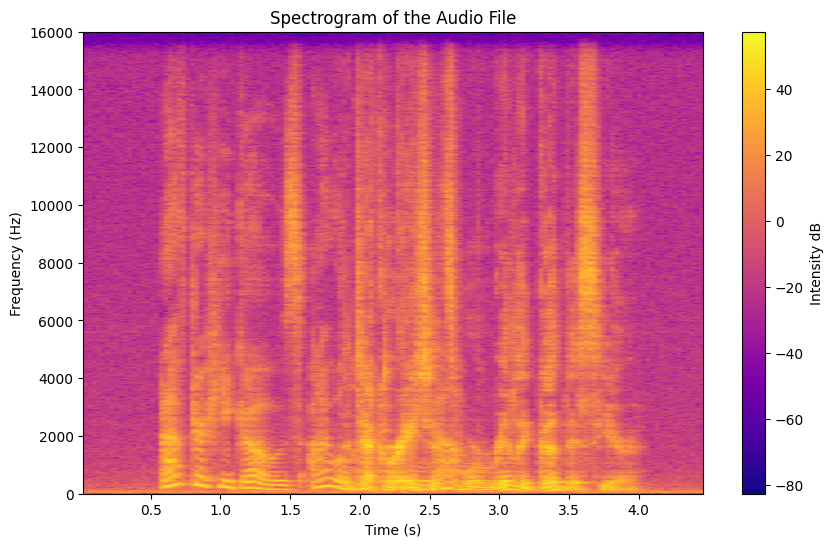

In [4]:
## Task 3: Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.specgram(data, Fs=sampling_rate, NFFT=2048, noverlap=1024, cmap='plasma')
plt.title('Spectrogram of the Audio File')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar(label='Intensity dB')
plt.show()

In [5]:
## Task 4: Process the signal in frames of length 20ms, with 0% overlap, print the number of frames to be processed

samples_per_frame = int(0.020 * sampling_rate)
frames = []

for i in range(0, len(data), samples_per_frame):
    frame = data[i:i + samples_per_frame]
    if len(frame) == samples_per_frame:
        frames.append(frame)

print(f"Number of frames to be processed: {len(frames)}")


Number of frames to be processed: 225


In [6]:
## Task 5: Write every 20ms audio data (column wise) into excel
df = pd.DataFrame(frames).transpose()
excel_path = '/Users/jithinbathula/Documents/Internships/Panasonic/Audio 2/audio_data.xlsx'

    
df.to_excel(excel_path, index=False)
print(f"Data written to Excel file: {excel_path}")

Data written to Excel file: /Users/jithinbathula/Documents/Internships/Panasonic/Audio 2/audio_data.xlsx


## Part B

In [7]:
vad = webrtcvad.Vad(3)  # Set aggressiveness mode to 3 (0 to 3)

vad_results = []
times = []
for i in range(len(frames)):
    frame = frames[i].tobytes()
    is_speech = vad.is_speech(frame, sampling_rate)
    vad_results.append(is_speech)
    times.append(i * 0.02)

In [8]:
vad_df = pd.DataFrame({'Time (s)': times, 'VAD Output': vad_results})

# Save VAD results to CSV
vad_csv_path = '/Users/jithinbathula/Documents/Internships/Panasonic/Audio 2/clip2_vad_results.csv'

vad_df.to_csv(vad_csv_path, index=False)
print(f"VAD results written to: {vad_csv_path}")

VAD results written to: /Users/jithinbathula/Documents/Internships/Panasonic/Audio 2/clip2_vad_results.csv


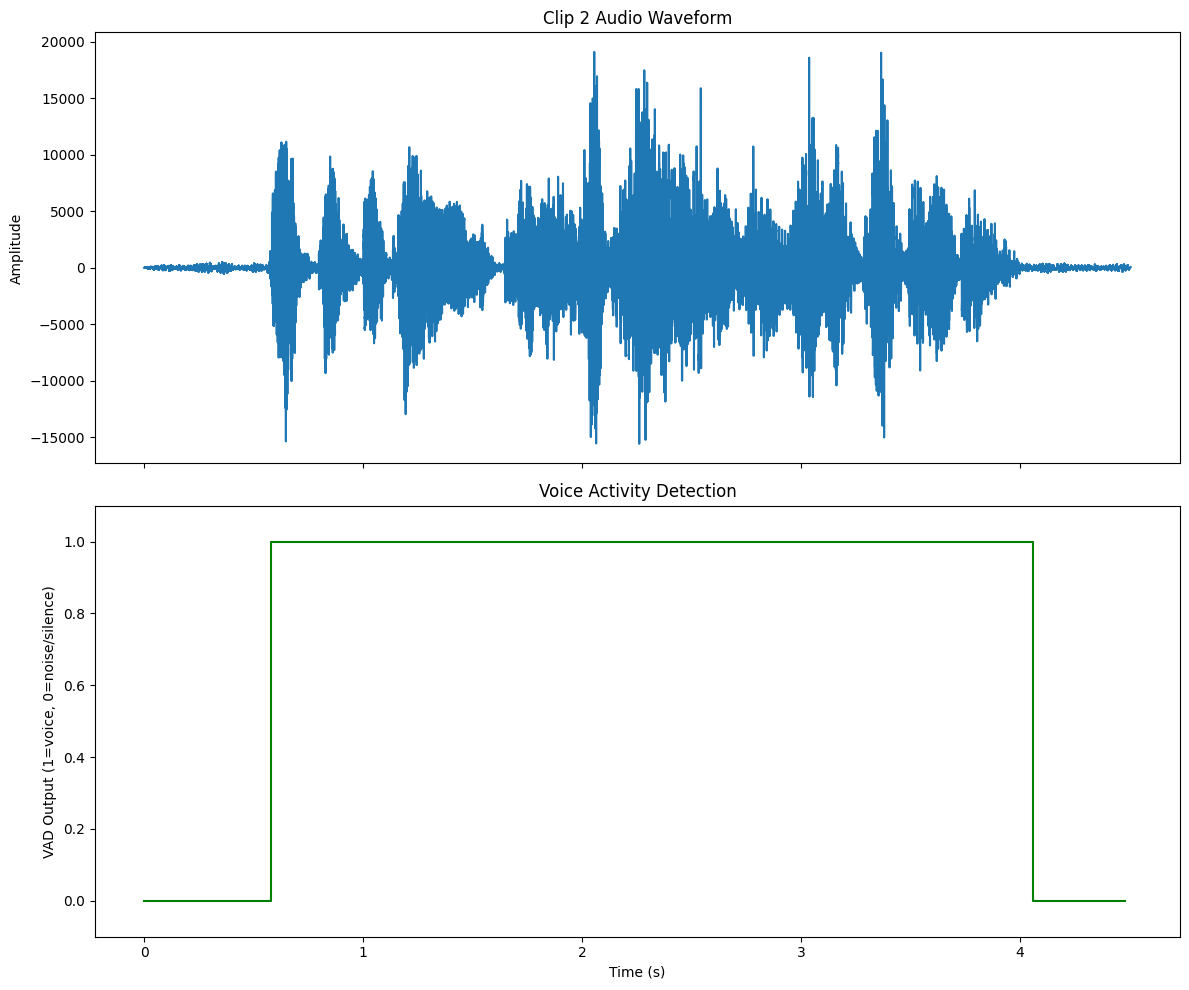

In [9]:
# Plotting the waveform and VAD outputs
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
# Plot audio waveform
axs[0].plot(time_data, data, label='Waveform')
axs[0].set_title('Clip 2 Audio Waveform')
axs[0].set_ylabel('Amplitude')

# Plot VAD output
axs[1].step(vad_df['Time (s)'], vad_df['VAD Output'], where='post', color='g', label='VAD Output')
axs[1].set_title('Voice Activity Detection')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('VAD Output (1=voice, 0=noise/silence)')
axs[1].set_ylim(-0.1, 1.1)  # Ensure VAD flags are clearly visible

plt.tight_layout()
plt.show()